# Model to predict housing prices

**Komal Ingawale**



# Index

- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis and Results](#3.2-Analysis-and-Results)
    - [3.3 Verification of Model Against Test Data](#3.3-Verification-of-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


## 1. Introduction

In this project, I aimed to create a predictive model for house prices using linear regression. The goal was to build a model that can accurately estimate the sale price of houses based on various features, providing valuable insights for buyers, sellers, and real estate professionals.
Here are the key steps I followed to solve this problem and create the prediction model:

Data Preprocessing: To prepare the data for analysis, I cleaned it by handling missing values. I also explored the dataset to gain a better understanding of the variables and their distributions.

Exploratory Data Analysis (EDA): EDA involved visualizing the data through histograms, scatter plots, and correlation matrices. This helped me identify relationships between variables and determine which ones had a significant impact on sale prices.

Data preparation: I prepared for the model by adjusting the set of independent variables. This aimed to improve its predictive accuracy.

Model Building: I implemented a linear regression model using Python and libraries like NumPy, pandas, and scikit-learn. The model used selected independent variables to predict house prices.

Test Model : I tested my model on given test data to check its accuracy.


[Back to top](#Index)

## 2. The Data

For this model building I imported necessary data such as csv file which contains all housing data and another csv file to test model.

I also imported some of the libraries of python,
pandas, matplotlib.pyplot , numpy , from sklearn import linear_model , from sklearn.impute import  SimpleImputer.

libraries are collections of pre-written code that provide various functionalities and tools to simplify common tasks.


[Back to top](#Index)

### 2.1 Import the Data



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.impute import SimpleImputer

#### These are all the necessary libraries imported

In [33]:

data = pd.read_csv('C:\MIT\Projects\houseSmallData\houseSmallData.csv')
test = pd.read_csv('C:\MIT\Projects\jtest\jtest.csv')


#### houseSmallData.csv file contains all independant and dependant data about houses. 
#### jtest.csv data we are going to use for testing our prediction module

[Back to top](#Index)

### 2.2 Data Exploration



#### selecting the first 100 rows of the DataFrame and includes all columns.

In [36]:
data.shape
train = data.iloc[0:100, :]
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
#pulling out and describing saleprice data from train
saleprice = train['SalePrice']
saleprice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

#### plotting histogram of saleprice

(array([ 2., 17., 35., 17., 11.,  8.,  5.,  3.,  1.,  1.]),
 array([ 40000.,  79878., 119756., 159634., 199512., 239390., 279268.,
        319146., 359024., 398902., 438780.]),
 <BarContainer object of 10 artists>)

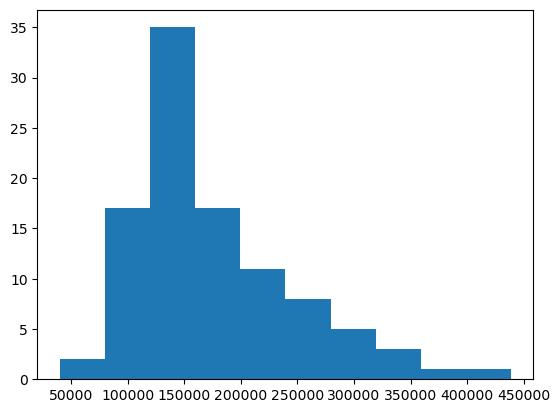

In [12]:


plt.hist(saleprice)



[Back to top](#Index)

### 2.3 Data Preparation




Cleaning and reshaping data for linear regression involves preparing dataset so that it can be effectively used to build a regression model. Here are the essential steps I followed for data preprocessing in linear regression:

I use data manipulation libraries like Pandas to load data into a DataFrame.

I considered first 100 rows and all columns from houseSmallData.csv and named as ‘train’.

Pull out and describe saleprice data from ‘train’.

Check distribution of SalePrice by plotting histogram.

Histogram look skewed and not normally distributed, then I considered log of Saleprice as ‘target’.

Search for, if there are some missing values and if there are some ,reshape them.

Repairing all the nulls using interpolate().

Checking data types: Ensure that  data types are appropriate (e.g., numerical for numerical features)
Search for correlation of different independent variables and select highly correlated data for model building.



In [16]:

nulls =pd.DataFrame(train.isnull().sum().sort_values(ascending= False)[0:20])
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6
GarageQual,6


[Back to top](#Index)

### 2.4 Correlation

I have calculated correlation of independent variables with Saleprice.

Then sort then descending way to get highly correlated variables.

That returns correlation percentage as, 

SalePrice      1.000000

OverallQual    0.855061

GrLivArea      0.735129

GarageArea     0.688249

GarageCars     0.663441

YearBuilt      0.658636

TotalBsmtSF    0.616297

GarageYrBlt    0.589361

FullBath       0.579505

MasVnrArea     0.571836


In [19]:
#to get numeric data

numeric = data.select_dtypes(include=[np.number])
numeric.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000


Then calcualted correlation using corr(), I've sorted correlated numeric variables in descending order so that I can choose top 10 most correlated variables to salesprice

In [20]:
#to find correlation of numeric data
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index

cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath', 'MasVnrArea'],
      dtype='object')

In [40]:
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea
0,7,1710,548,2,2003,856,2003.0,2,196.0
1,6,1262,460,2,1976,1262,1976.0,2,0.0
2,7,1786,608,2,2001,920,2001.0,2,162.0
3,7,1717,642,3,1915,756,1998.0,1,0.0
4,8,2198,836,3,2000,1145,2000.0,2,350.0
...,...,...,...,...,...,...,...,...,...
95,6,1470,420,2,1993,680,1993.0,2,68.0
96,7,1588,472,2,1999,1588,1999.0,2,183.0
97,4,960,432,1,1965,960,1965.0,1,48.0
98,5,835,366,1,1920,458,1920.0,1,0.0


 Above is the list I found as a new set of highly correlated variables


[Back to top](#Index)

## 3. Project Description

Summary of algorithms I have used to analyze the data :

I have cleaned and reshaped imported data first.

I have then calculated correlation of independent variables with Saleprice.

Then sort then descending way to get highly correlated variables.

I considered three different group of variables to get best variable group to predict Saleprice more accurately.

First I considered 10 highly correlated variables that gave me prediction 0.85.

Secondly , I considered first 14 correlated variables that returned with 0.88 prediction.

And last I considered group of 10 least correlated variables and that calculated prediction of 0.89.


[Back to top](#Index)

### 3.1 Linear Regression





### Description :
Linear regression is a fundamental statistical method used for modeling the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data. In this project, linear regression is employed to understand the factors influencing a SalePrice variable.

#### Model Representation:
Linear regression assumes a linear relationship between the target variable Y and the feature(s) X. It's represented by the equation:
Y = β0 + β1 * X1 + β2 * X2 + ... + βn * Xn + ε
 The primary objective of linear regression is to find the best-fitting line (hyperplane) that minimizes the sum of squared differences between the observed and predicted values. It uses the method of least squares to estimate the coefficients.
 
#### Python Implementation Steps:
Data Preparation: Load and preprocess the dataset, ensuring that missing values are handled, and data is split into features (X) and the target (Y).

Model Selection: Choose the specific linear regression variant (e.g., simple linear regression with one feature or multiple linear regression with multiple features).

Model Training: Calculate the coefficients β0, β1, β2, ... using the least squares method. This can be done using numerical libraries like NumPy or scikit-learn's LinearRegression class.

Prediction: Use the trained model to make predictions on new data or validate the model's performance on a test dataset.

Visualization: Visualize the linear regression line and the actual vs. predicted values using libraries like Matplotlib.

Interpretation: Interpret the coefficients and their significance. The coefficients can provide insights into the strength and direction of the relationships between features and the target.

#### building a linear regression model

In [22]:


lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

#### How good the model is

In [23]:

model.score(X, Y)

0.8514139172459031

(array([ 2.,  5.,  7., 23., 30., 17.,  8.,  5.,  1.,  2.]),
 array([-72442.25967783, -56455.25671473, -40468.25375163, -24481.25078852,
         -8494.24782542,   7492.75513768,  23479.75810078,  39466.76106388,
         55453.76402698,  71440.76699008,  87427.76995318]),
 <BarContainer object of 10 artists>)

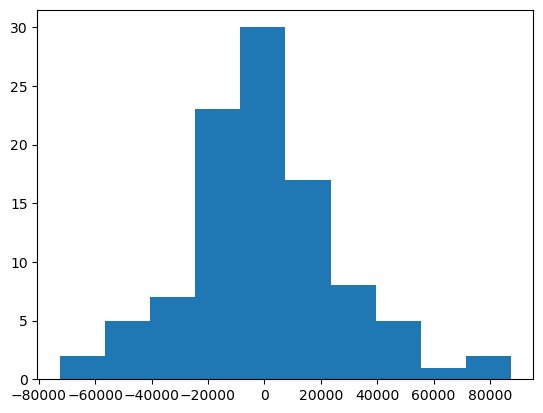

In [24]:
plt.hist(Y - predictions)

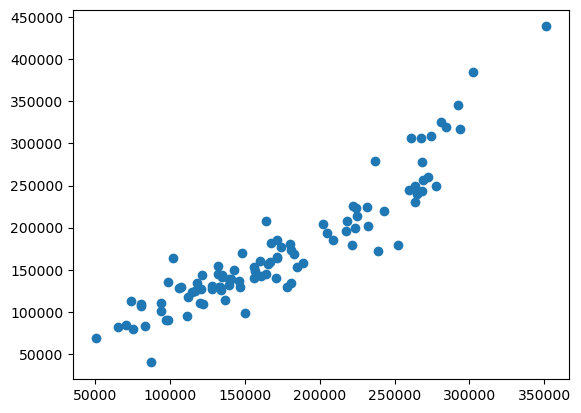

In [25]:
#scatter plot prediction
plt.scatter(predictions, Y)

[Back to top](#Index)

### 3.2 Analysis and Results

I have tested all three variable groups out of which third group with least correlated independent variables, returned prediction od Saleprice data highest accurately with 0.89 percent 
 
Resulted in third group of variables gave me maximum prediction accuracy .

I tested this analysis with given test data and that resulted in 0.89 accurate prediction.






[Back to top](#Index)

### 3.3 Verification of Model Against Test Data

I have used my best worked analysis on given tested data that returned 0.89 percent accurate prediction.


In [26]:

test = pd.read_csv('C:\MIT\Projects\jtest\jtest.csv')


test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [27]:
#testing model
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath,MasVnrArea
0,6,1610,480,2,1977,1610,1977.0,2,28.0
1,6,1732,476,2,1985,741,1985.0,2,336.0
2,5,1535,410,2,1979,0,1979.0,2,0.0
3,7,1226,740,3,2009,1226,2009.0,2,0.0
4,7,1818,240,1,1931,1040,1951.0,1,600.0
...,...,...,...,...,...,...,...,...,...
95,6,1456,440,2,1976,855,1976.0,2,0.0
96,7,1726,786,3,2007,1726,2007.0,2,205.0
97,8,3112,795,2,1918,1360,1918.0,2,0.0
98,6,2229,0,0,1912,755,NaN,1,0.0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the input data
X_imputed = imputer.fit_transform(X)

# Create and fit the linear regression model
lr = LinearRegression()
model = lr.fit(X_imputed, Y)

# Make predictions using the model
predictions = model.predict(X_imputed)

In [29]:
model.score(X_imputed,Y)

0.822870258740328

(array([ 2.,  2.,  4., 13., 26., 29., 14.,  6.,  3.,  1.]),
 array([-104969.23022372,  -84230.3621792 ,  -63491.49413468,
         -42752.62609016,  -22013.75804564,   -1274.89000112,
          19463.9780434 ,   40202.84608792,   60941.71413244,
          81680.58217696,  102419.45022148]),
 <BarContainer object of 10 artists>)

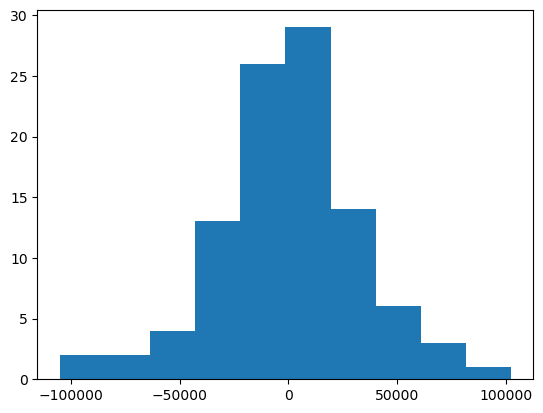

In [30]:
plt.hist(Y - predictions)

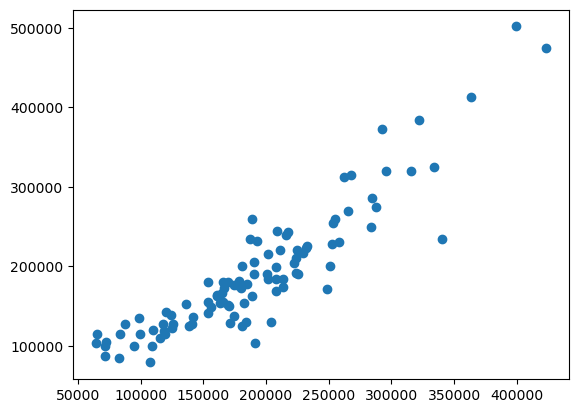

In [31]:
#scatter plot prediction
plt.scatter(predictions, Y)

[Back to top](#Index)

## Conclusion

According to my model building variable group with least correlation with target variable predicted higher accurately. Creating a house sale price prediction model enhanced my understanding of data analysis techniques. I learned to clean and preprocess data, select relevant features, perform correlation analysis, and build predictive models, particularly linear regression.





[Back to top](#Index
)
## References

All references used to complete this project :

Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Instructor - - Team ManifoldAILearning Website - Udemy.com URL - https://udemy.com/course/statistics-probability-for-data-science/learn/lecture/34156008#overview

Instructor - BI insight inc Website- youtube.com URL - https://youtu.be/ogr_oiq0zQA?si=PvFg9SHetKXw1nuz

